<a href="https://colab.research.google.com/github/lightAjin/Haberman_Cancer_Survival/blob/main/Haberman_Cancer_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly.
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
path="/content/haberman.csv"
df=pd.read_csv('haberman.csv')
df.columns=["age","operation_Year","axil_nodes","survival_status"]
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster.
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

**Number of data points and features**

In [ ]:
print(df.shape)

(305, 4)


Observation:It consist of 307 rows and 4 columns

**Name and number of classes**

In [ ]:
print(df.columns)
cols=len(df.axes[1])
print(cols)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')
4


Observation:It consist of 4 classes

**Data points per class**

In [ ]:
df["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: age, dtype: int64

In [ ]:
df["operation_Year"].value_counts()

58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: operation_Year, dtype: int64

In [ ]:
df["axil_nodes"].value_counts()

0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: axil_nodes, dtype: int64

In [ ]:
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

**Observations**
 1. First column shows about Age of the patient.
    2. Second column shows about Operation_year i.e people operated in the year 19XX (inbetween 1958 to 1970).
    3. Third column shows about number of axil_nodes(the nodes which are responsible for cancer) i.e number of tumors found.
    4. Fourth column shows about Survival status of person after operation

        1 - Shows about the person survived 5 years or longer.

        2-  Shows about the person died in less than 5 years

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Obs:
1. Shape of data is 306 rows and 4 columns
2. Columns are Age, Operation_year,axil_nodes,Survival status
3. From information of data,all elements are non-null and int values

In [ ]:
# how many patients survived over 5 years and more and how many died within 5years?
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

Obs:Out of 306.
    225 survived and 81 died

In [ ]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:
1. The Age of the patients vary from 30 to 83 with the median of 52.
2. Although the maximum number of positive axil nodes observed is 52, nearly 75% of the patients have less than 5 positive axil nodes and nearly 25% of the patients have no positive axil nodes

**Objective:
To predict whether a patient will survive after 5 years or not based upon the patient's
age,his/her operation_year and the number of axil_nodes.**

In [ ]:
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable.
- Do write observations/inference for each plot.

**Histogram**

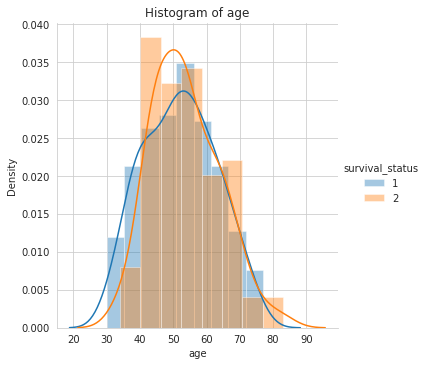

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.FacetGrid(df,hue='survival_status',height=5)\
    .map(sns.distplot,'age')\
    .add_legend();
plt.title('Histogram of age')
plt.show()

Observation:-
Surv_status 1 shows how many people survived more than 5 years by their age

Surv_status 2 shows how many people survived less than 5 years by their age

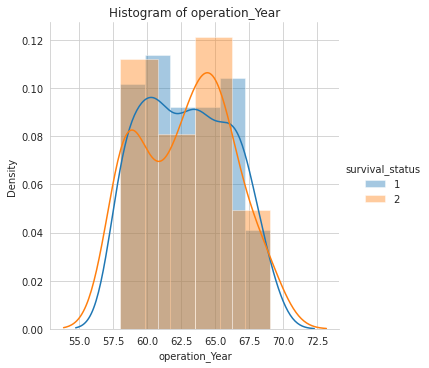

In [ ]:
sns.FacetGrid(df,hue='survival_status',height=5)\
    .map(sns.distplot,'operation_Year')\
    .add_legend();
plt.title('Histogram of operation_Year')
plt.show()

Observation:-
Surv_status 1 shows how many people survived more than 5 years by their Operation year

Surv_status 2 shows how many people survived less than 5 years by their Operation year

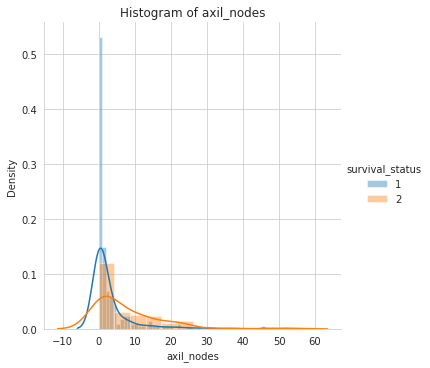

In [ ]:
sns.FacetGrid(df,hue='survival_status',height=5)\
    .map(sns.distplot,'axil_nodes')\
    .add_legend();
plt.title('Histogram of axil_nodes')
plt.show()

Observation:-
  In this Histogram Axil_nodes plot it can be seen more clearly in compare to Op_year and Age.

  Surv_status 1 shows how many people survived more than 5 years by their Axil_nodes

  Surv_status 2 shows how many people survived less than 5 years by their Axil_nodes

In-depth Observation:-
1.From the above Histograms(Univariate analysis) both Age and Operation_Year are not good features
 for useful insights as the distibution is more similar for both people who survived and also dead.

2.positive_lymph_nodes is the only feature that is useful to know about the survival status
 of patients as there is difference between the distributions for both classes(labels)
From that distibution we can infer that most survival patients have fallen in to zero Axil_nodes

3.From the year distribution, we can observe that people who didnt survive suddenly rise and fall in
between 1958 and 1960. More number of people are not survived in year of operation of 1965

**PDF AND CDF**

PDF
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
CDF
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


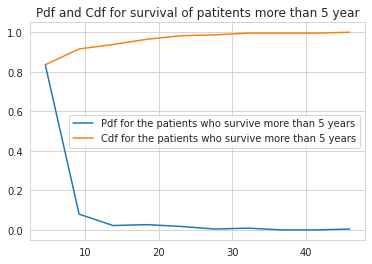

In [ ]:
#divide the data set in two according to the label Survival status
# alive means status=1 and dead means status =2
alive=df.loc[df["survival_status"]==1]
dead=df.loc[df["survival_status"]==2]
counts, bin_edges = np.histogram(alive['axil_nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print("PDF")
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print("CDF")
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.title('Pdf and Cdf for survival of patitents more than 5 year')
plt.show()

PDF
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


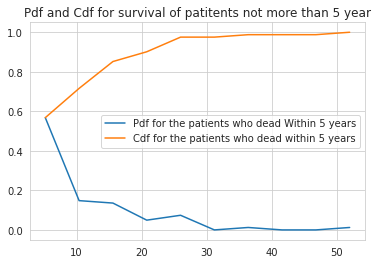

In [ ]:
counts, bin_edges = np.histogram(dead['axil_nodes'], bins=10, density=True)

pdf = counts/(sum(counts))
print("PDF")
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print("CDF")
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years',
            'Cdf for the patients who dead within 5 years'])
plt.title('Pdf and Cdf for survival of patitents not more than 5 year')
plt.show()

Observation:-
1.Yellow line represent cdf.

2.Blue line represent pdf.

3.By observing both lines in graph we can see the percentage of survival_status by their Axil_nodes


**Box Plot**

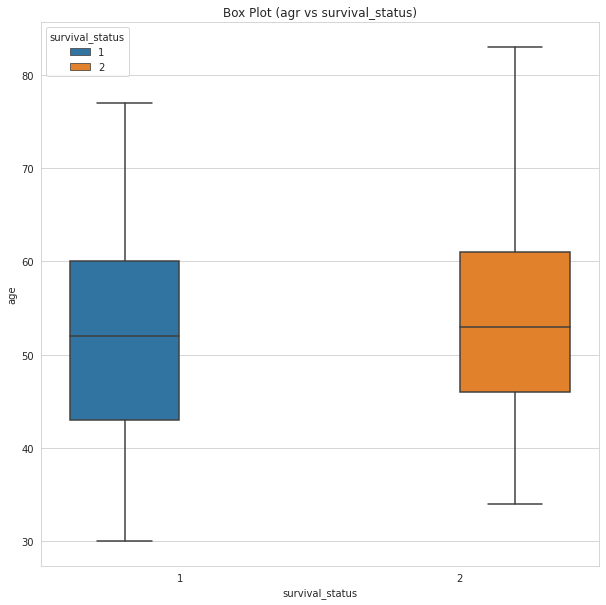

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Box Plot (agr vs survival_status)")
sns.boxplot(data=df,x='survival_status',y='age',hue='survival_status')

Observation:-
As we cab observe in the box plot of survival_status and age

1 denotes for them who lived more than 5 years after operation
by their age and box edge 25,50,75(percentile)

2 denotes for them who lived more than 5 years after operation
by their age and box edge 25,50,75(percentile)

Q.At min below what age people survived after operation for more than 5 years?
Ans.At 45

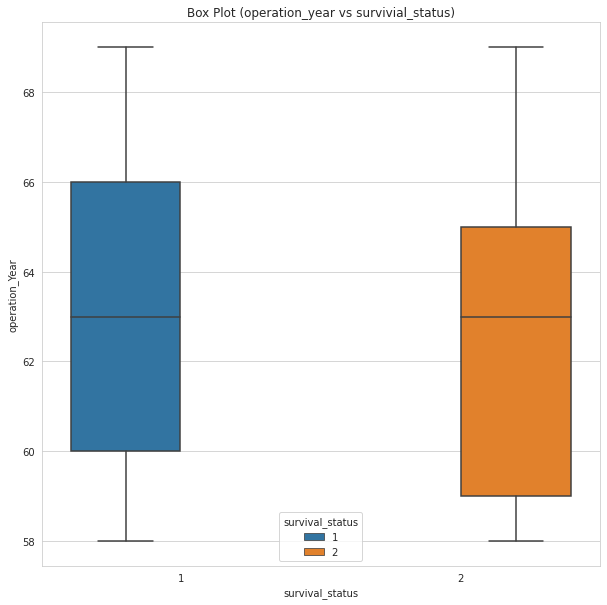

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Box Plot (operation_year vs survivial_status)")
sns.boxplot(data=df,x='survival_status',y='operation_Year',hue='survival_status')

Observations:-
As we cab observe in the box plot of Survival_status and

1 denotes for them who lived more than 5 years after operation
by their operation_year and box edge 25,50,75(percentile)

2 denotes for them who lived more than 5 years after operation
by their Operation_year and box edge 25,50,75(percentile)


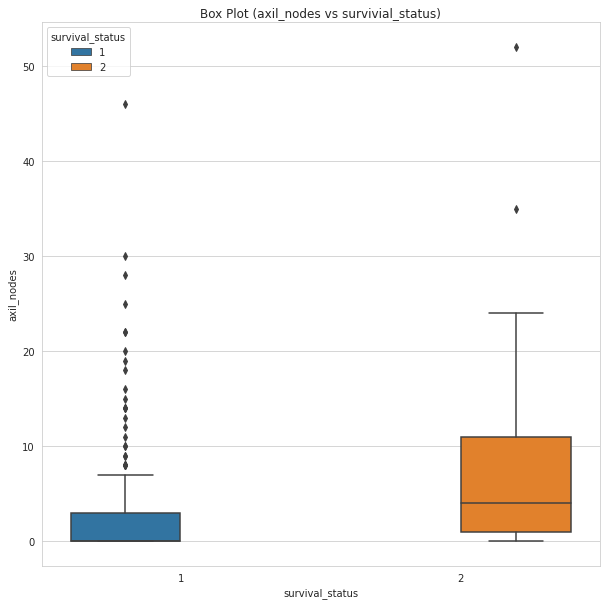

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Box Plot (axil_nodes vs survivial_status)")
sns.boxplot(data=df,x='survival_status',y='axil_nodes',hue='survival_status')

Observation:-
As we cab observe in the box plot of Surv_status and Axil_nodes

1 denotes for them who lived more than 5 years after operation
by their Axil_nodes and box edge 25,50,75(percentile)

2 denotes for them who lived less than 5 years after operation
by their Axil_nodes and box edge 25,50,75(percentile)

So in the above boxplot it can be seen that axil nodes less than 3 has higher
probability of survival_stauts=1 after operation

**Violin Plot**

Text(0.5, 1.0, 'Violin Plot(age vs survival_status)')

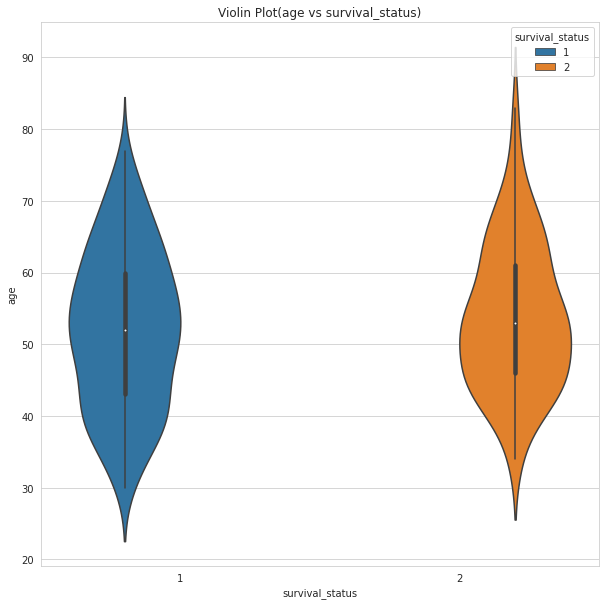

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='survival_status',y='age',data=df,hue='survival_status')
plt.title('Violin Plot(age vs survival_status)')

Text(0.5, 1.0, 'Violin Plot(axil_nodes vs survival_status)')

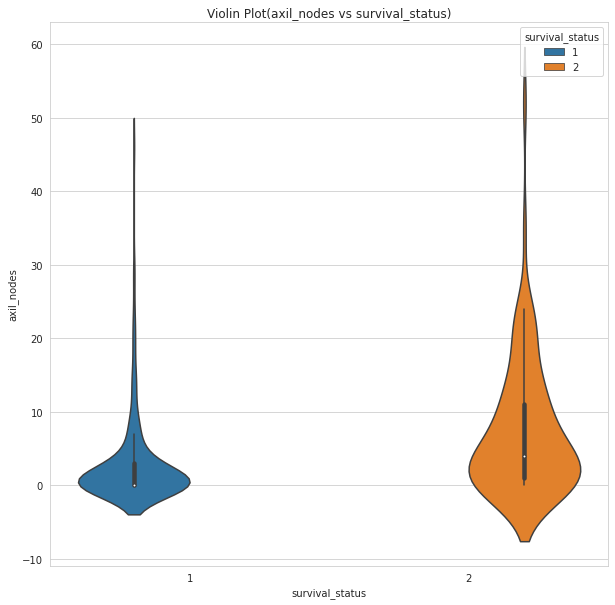

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='survival_status',y='axil_nodes',data=df,hue='survival_status')
plt.title('Violin Plot(axil_nodes vs survival_status)')

Observation:-
As we cab observe in the violin plot of Surv_status and Axil_nodes

1 denotes for them who lived more than 5 years after operation
by their Axil_nodes

2 denotes for them who lived less than 5 years after operation
by their Axil_nodes

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable.
- Do write observations/inference for each  plot.


**2D Scatter Plot**

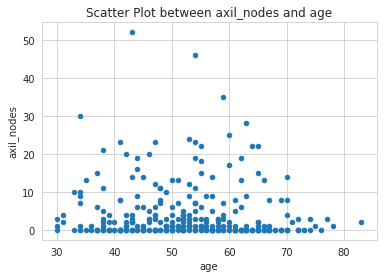

In [ ]:
df.plot(kind='scatter', x='age', y='axil_nodes') ;
plt.title('Scatter Plot between axil_nodes and age')
plt.show()

observation:

Most of the people have 0 positive Axil_nodes

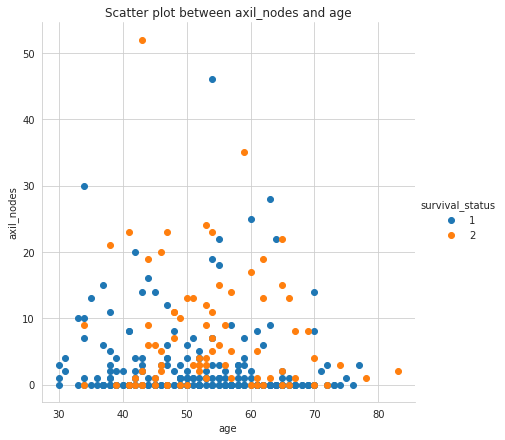

In [ ]:


sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.title('Scatter plot between axil_nodes and age')
plt.show();

Observations:

1.It seems most of the patients have 0 axil nodes detected.

2.Here we clearly see that blue points are not seperated from orange points.

3.So, by looking this 2-D scatter plot between 'Age' and 'axil nodes' we cannot make any decision regarding patient's survival.

Now, for these combination to analyse,Pair-Plot concept is used)

**Pair Plot**

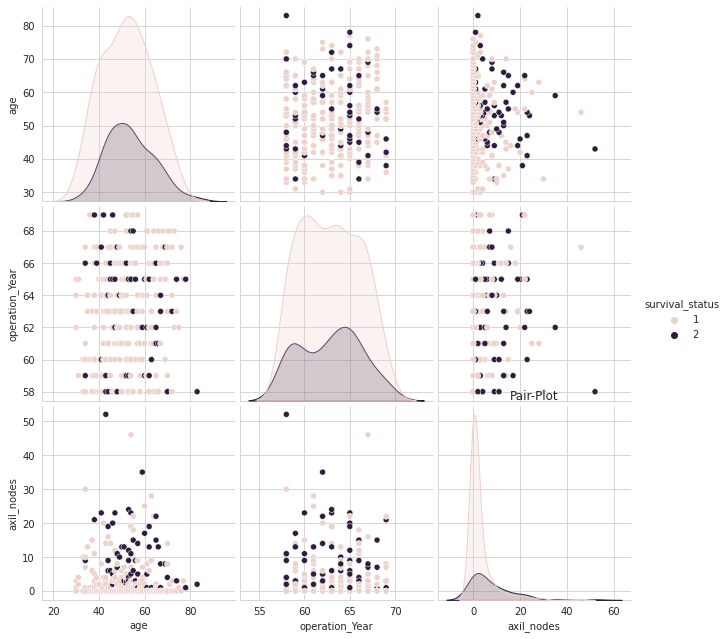

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status",
             vars=['age','operation_Year','axil_nodes'], size=3)
plt.title("Pair-Plot")
plt.show()

Observations:

1.axil nodes VERSUS Age is the useful plot to atleast get the insight that most people who  survived have 0 axil nodes detected.

2.It looks like we cannot distinguish the data easily with the help of above scatter plots as most of  them are overlapping.

**Mean,variance and std-dev**

In [ ]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
alive.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,age,operation_Year,axil_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [ ]:
print("Summary Statistics of Patients who are dead in less than 5 years:")
dead.describe()

Summary Statistics of Patients who are dead in less than 5 years:


,age,operation_Year,axil_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations:

1.From both the tables we can observe that almost for all the features the statistics are similar except for Axil_nodes.

2.The mean(average) of Axil_nodes is more for people who died within 5 years than people who have survived for more than 5 years

3.From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of Axil_nodes have survived.

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive["axil_nodes"]))
#Median with an outlier
print(np.median(np.append(alive["axil_nodes"],50)));
print(np.median(dead["axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(alive["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(dead["axil_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["axil_nodes"],90))
print(np.percentile(dead["axil_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["axil_nodes"]))
print(robust.mad(dead["axil_nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

**Conclusion**

1.There are 306 observations with 4 features in the data set.

2.It is an imbalanced dataset with-

a. 225 patients belonging to status 1, those who survived for 5 years and longer and
b. 81 patients belonging to status 2, those who survived for less than 5 years.


3.Using Pair-plot concept(Bi-variate analysis)-

a.axil nodes VERSUS Age is the useful plot to atleast get the insight that
most people who survived have 0 axil nodes detected.

b.age and operation_Year have overlapping curves which makes difficult for classifying the survival status.

c.But we cannot distinguish the data easily with the help of these plots as most of them are overlapping.

4.Using PDFs(Uni-variate Analysis)-

a.both age and operation_Year are not good features for useful insights as the
distibution is more similar for both people who survived and also dead.

b.axil nodes is the only feature that is useful to know about the survival
status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to 0 axil nodes.

c. More number of people are not survived in year of operation of 1965.

5.Using CDFs(Uni-variate analysis)-

a. We can observe that almost for all the features the statistics are similar except for axil nodes.

b. We can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of axil nodes have survived over 5 years.

6.The mean(average) of axil nodes is more for people who died within 5 years than people who have survived for more than 5 years.

7.Mean age of patients who survived is 52 years and who didn't survive is 54 years.

8.Using Box plot and Violin plots-

a. The number of axil nodes of the survivors is highly densed from 0 to 5.

b. Almost 80% of the patients have less than or equal to axil nodes survived
more than 5 years.

c. From box plots and violin plots, we can say that more no. of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.